# Analysis of Siren based trained models vs JPEG

- enable dark mode jupiter:
    - jt -t monokai -f fira -fs 10 -nf ptsans -nfs 11 -N -kl -cursw 2 -cursc r -cellw 95% -T
- disable set theme:
    - jt -r

### Fetch Libs, data

In [1]:
# --- Import libs for running notebook.

from utils.libs import *

In [2]:
# --- Read config file for runnig notebook.

conf_file_path = 'conf.txt'
conf_data = read_conf_file(conf_file_path)

# pprint(conf_data)

In [3]:
typename = 'QueryConstraints'
field_names = "image;date;timestamp;hidden_features;image_size;status".split(";")
QueryConstraints = collections.namedtuple(typename, field_names)

In [4]:
image = dict(zip(['type', 'val'], [str, list(sorted("cameramen".split(";")))]))
date = None
timestamp = dict(zip(['type', 'val'], [str, list(sorted("".split(";")))]))
hidden_features = dict(zip(['type', 'val'], [int, list(sorted("".split(";")))]))
image_size = dict(zip(['type', 'val'], [str, list(sorted("[256,256]".split(";")))]))
status = dict(zip(['type', 'val'], [str, list(sorted("done".split(";")))]))

fields_list = [image, date, timestamp, hidden_features, image_size, status]
constraints = QueryConstraints._make(fields_list)

pprint(constraints)

QueryConstraints(image={'type': <class 'str'>, 'val': ['cameramen']}, date=None, timestamp={'type': <class 'str'>, 'val': ['']}, hidden_features={'type': <class 'int'>, 'val': ['']}, image_size={'type': <class 'str'>, 'val': ['[256,256]']}, status={'type': <class 'str'>, 'val': ['done']})


In [5]:
# --- Fetch data about carryed out trainings.
# train_df, _, records_list = fetch_data(conf_data)

records_list, result_dict_df, query_str, chained_constraints = fetch_data_by_constraints(
    conf_data, constraints, fetch_data_downloaded = True)

SELECT image,date,timestamp,hidden_features,image_size,status,data_downloaded FROM table_runs_logged WHERE   (image = 'cameramen') AND (image_size = '[256,256]')  AND (status = 'done') ;


In [6]:
data = list(map(operator.methodcaller('_asdict'), records_list))
records_df = pd.DataFrame(data = data)

records_df.head(5)

,image,date,timestamp,hidden_features,image_size,status,data_downloaded,full_path
0,cameramen,23/10/20,1603478755-305517,75,"[256,256]",done,TRUE,C:\\Users\\Francesco\\Documents\\tests\\siren-...
1,cameramen,24/10/20,1603557121-338703,55,"[256,256]",done,TRUE,C:\\Users\\Francesco\\Documents\\tests\\siren-...
2,cameramen,25/10/20,1603583765-067812,55,"[256,256]",done,TRUE,C:\\Users\\Francesco\\Documents\\tests\\siren-...
3,cameramen,26/10/20,1603672968-148557,85,"[256,256]",done,TRUE,C:\\Users\\Francesco\\Documents\\tests\\siren-...
4,cameramen,26/10/20,1603731938-952001,85,"[256,256]",done,TRUE,C:\\Users\\Francesco\\Documents\\tests\\siren-...


In [7]:
data = list(map(operator.itemgetter(1), result_dict_df.items()))
train_df = pd.concat(data)

train_df.head(5)

,#params,seed,hl,hf,mse,psnr,ssim,eta
1603478755-305517,57301.0,0.0,10.0,75.0,0.000006,58.145780,0.998769,2688.703879
1603478755-305517,57301.0,42.0,10.0,75.0,0.000009,56.492704,0.998202,2690.827056
1603478755-305517,57301.0,123.0,10.0,75.0,0.000006,58.214385,0.999085,2686.608420
1603478755-305517,63001.0,0.0,11.0,75.0,0.000018,53.486111,0.997542,2904.513145
1603478755-305517,63001.0,42.0,11.0,75.0,0.000005,58.401365,0.999003,2906.302068


In [8]:
# np.unique(pd.DataFrame(data = list(map(operator.methodcaller('_asdict'), records_list)))['image_size'].values)
if records_list is not None:
    records_df = pd.DataFrame(data = list(map(operator.methodcaller('_asdict'), records_list)))
    print(records_df.info())
    print(records_df.sort_values(by = ['hidden_features']).head(5))
    pass

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   image            7 non-null      object
 1   date             7 non-null      object
 2   timestamp        7 non-null      object
 3   hidden_features  7 non-null      int64 
 4   image_size       7 non-null      object
 5   status           7 non-null      object
 6   data_downloaded  7 non-null      object
 7   full_path        7 non-null      object
dtypes: int64(1), object(7)
memory usage: 576.0+ bytes
None
       image      date          timestamp  hidden_features image_size status  \
1  cameramen  24/10/20  1603557121-338703               55  [256,256]   done   
2  cameramen  25/10/20  1603583765-067812               55  [256,256]   done   
5  cameramen  27/10/20  1603774067-025589               64  [256,256]   done   
6  cameramen  27/10/20  1603816949-617728               64  [256,256] 

In [9]:
train_df.head(5)

,#params,seed,hl,hf,mse,psnr,ssim,eta
1603478755-305517,57301.0,0.0,10.0,75.0,0.000006,58.145780,0.998769,2688.703879
1603478755-305517,57301.0,42.0,10.0,75.0,0.000009,56.492704,0.998202,2690.827056
1603478755-305517,57301.0,123.0,10.0,75.0,0.000006,58.214385,0.999085,2686.608420
1603478755-305517,63001.0,0.0,11.0,75.0,0.000018,53.486111,0.997542,2904.513145
1603478755-305517,63001.0,42.0,11.0,75.0,0.000005,58.401365,0.999003,2906.302068


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 1603478755-305517 to 1603816949-617728
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   #params  111 non-null    float64
 1   seed     111 non-null    float64
 2   hl       111 non-null    float64
 3   hf       111 non-null    float64
 4   mse      111 non-null    float64
 5   psnr     111 non-null    float64
 6   ssim     111 non-null    float64
 7   eta      111 non-null    float64
dtypes: float64(8)
memory usage: 7.8+ KB


In [11]:
train_df.describe()

,#params,seed,hl,hf,mse,psnr,ssim,eta
count,111.000000,111.000000,111.000000,111.000000,1.110000e+02,111.000000,111.000000,111.000000
mean,41967.918919,55.000000,8.378378,68.756757,5.613553e-05,51.825790,0.995318,2005.588444
std,22397.910677,51.280512,3.213760,12.123018,8.049019e-05,5.495800,0.005960,714.260700
min,9461.000000,0.000000,3.000000,55.000000,9.706207e-07,39.305184,0.959150,913.606552
25%,24861.000000,0.000000,6.000000,55.000000,1.123466e-05,47.732356,0.994309,1471.594479
50%,37181.000000,42.000000,9.000000,64.000000,2.341169e-05,52.498011,0.997383,1922.584690
75%,57301.000000,123.000000,11.000000,85.000000,6.520176e-05,55.602748,0.998578,2381.875654
max,95371.000000,123.000000,13.000000,85.000000,4.519178e-04,65.722240,0.999817,3499.902338


### Calculate Jpge

Image size: (512, 512)


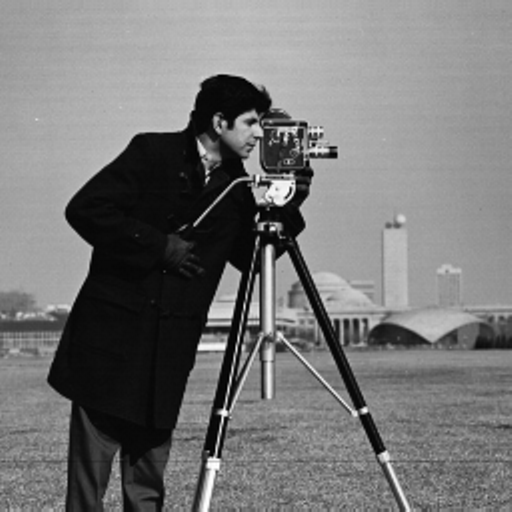

In [12]:
# --- Load target image.
im = load_target_image(image_file_path = None)
print('Image size:', im.size)
im

In [13]:
crop_size = conf_data['cropped_image']['crop_size']
if isinstance(crop_size, str):
    crop_size = eval(crop_size)
elif isinstance(crop_size, int):
    crop_size = (crop_size, crop_size)
    pass
# type(crop_size[0])

Image size: (256, 256)


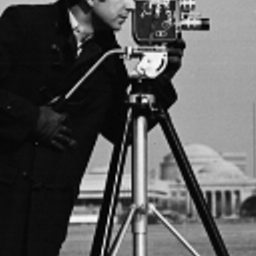

In [14]:
if conf_data['cropped_image']['flag'] is True:
    im_cropped = get_cropped_by_center_image(im, target = crop_size)
    pass
else:
    im_cropped = im
print('Image size:', im_cropped.size)
im_cropped

In [15]:
# --- Array of qualities to be tested in compression.
qualities_arr = np.arange(20, 95+1, dtype = np.int)

In [16]:
# --- Run several trials for JPEG compression.

cropped_file_size_bits = None

# im_cropped = im
# im_cropped = Image.fromarray(skimage.data.camera())
with BytesIO() as f:
    im_cropped.save(f, format='PNG')
    cropped_file_size_bits = f.getbuffer().nbytes * 8
    pass

result_tuples, failure_qualities = \
  calculate_several_jpeg_compression(im_cropped, cropped_file_size_bits, qualities_arr)

In [17]:
# data = list(map(lambda xx: xx._asdict(), result_tuples))
data = list(map(operator.methodcaller('_asdict'), result_tuples))
result_jpeg_df = pd.DataFrame(data = data)
result_jpeg_df.head(5)

,psnr,ssim,quality,file_size_bits,bpp,width,heigth,CR
0,33.270993,0.939424,20,33064,0.504517,256,256,7.682071
1,33.514350,0.940436,21,33968,0.518311,256,256,7.477626
2,33.684117,0.941620,22,34736,0.530029,256,256,7.312298
3,33.928492,0.944786,23,35408,0.540283,256,256,7.173520
4,34.115361,0.946817,24,36000,0.549316,256,256,7.055556


### Show graphics.

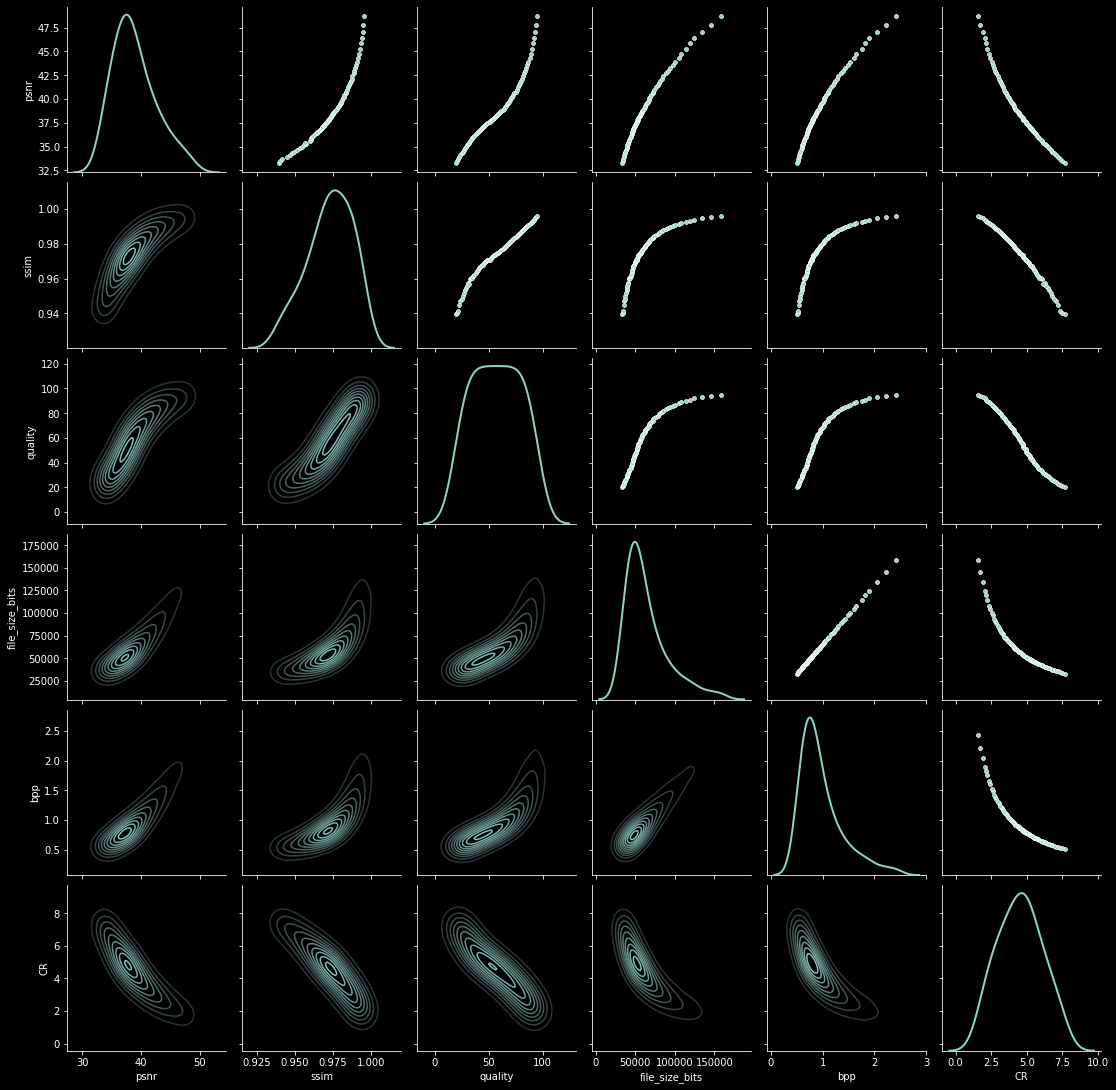

In [18]:
# sns.pairplot(results_history_df)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    try:
        g = sns.PairGrid(result_jpeg_df.drop(['width', 'heigth'], axis = 1), diag_sharey=False)
        g.map_upper(sns.scatterplot, s=15) # 
        g.map_lower(sns.kdeplot)
        g.map_diag(sns.kdeplot, lw=2)
        # plt.savefig(f"{images_conf.df_jpeg_scatterplot}")
    except Exception as err:
        print(str(err))
        pass
    pass

In [19]:
train_df['bpp'] = train_df['#params'].values * 32 / (im_cropped.size[0] * im_cropped.size[1])

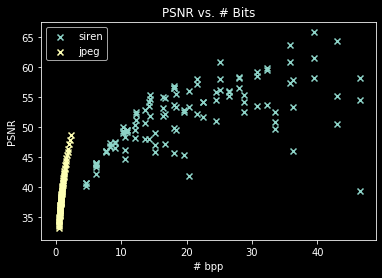

In [20]:
compare_compressions(compression_1_df=train_df, compression_2_df=result_jpeg_df)

In [21]:
result_jpeg_df.columns, train_df.columns

(Index(['psnr', 'ssim', 'quality', 'file_size_bits', 'bpp', 'width', 'heigth',
        'CR'],
       dtype='object'),
 Index(['#params', 'seed', 'hl', 'hf', 'mse', 'psnr', 'ssim', 'eta', 'bpp'], dtype='object'))

In [22]:
train_df['compression'] = list(map(lambda hf: f'siren-{hf}', train_df['hf'].values.astype(dtype = np.int)))

In [23]:
result_jpeg_df['compression'] = ['jpeg'] * result_jpeg_df.shape[0]
# train_df['compression'] = ['siren'] * train_df.shape[0]
train_df['file_size_bits'] = train_df['#params'].values * 32
train_df['CR'] = cropped_file_size_bits / (train_df['#params'].values * 32)

In [24]:
result_jpeg_df.columns, train_df.columns

(Index(['psnr', 'ssim', 'quality', 'file_size_bits', 'bpp', 'width', 'heigth',
        'CR', 'compression'],
       dtype='object'),
 Index(['#params', 'seed', 'hl', 'hf', 'mse', 'psnr', 'ssim', 'eta', 'bpp',
        'compression', 'file_size_bits', 'CR'],
       dtype='object'))

In [25]:
train_df_columns_for_merge = "psnr,ssim,CR,bpp,file_size_bits,compression".split(",")
result_jpeg_df_columns_for_merge = "psnr,ssim,CR,bpp,file_size_bits,compression".split(",")

data_frames_list = [
    train_df[train_df_columns_for_merge],
    result_jpeg_df[result_jpeg_df_columns_for_merge],
]
merged_df = pd.concat(data_frames_list, names = "psnr,ssim,CR,bpp,file_size_bits,compression".split(","))

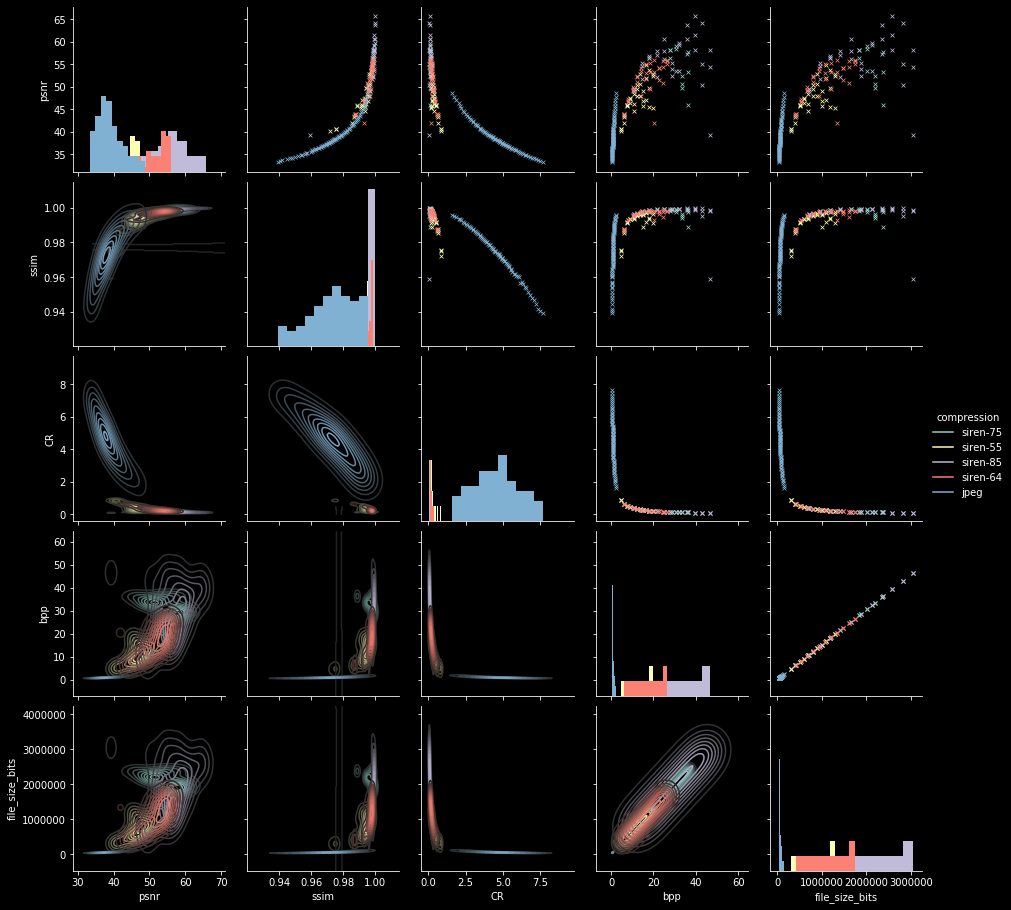

In [26]:
g = sns.PairGrid(merged_df, hue="compression")
g.map_diag(plt.hist)
# g.map_offdiag(sns.scatterplot, marker='x')
g.map_upper(sns.scatterplot, marker='x', s=15) 
g.map_lower(sns.kdeplot)
g.add_legend()
# g.savefig("scatter_plot_dataframes_merged.png")
plt.show()

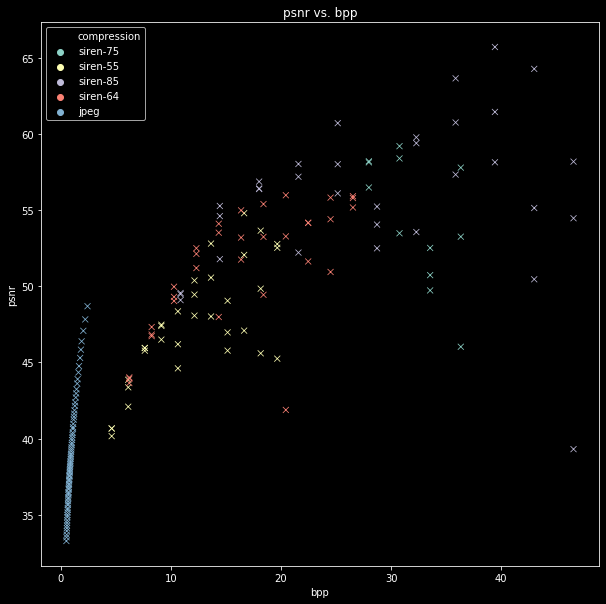

In [27]:
x = 'bpp'
x_vars = "bpp,file_size_bits".split(",")
y_vars = "psnr,ssim,CR".split(",")[0:1]
y = "psnr"
hue = "compression"

fig, ax = plt.subplots(1, len(y_vars[0:1]), figsize = (10, 10))
# fig.suptitle(f"{x} vs. others")

chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, ax=ax, hue='compression', marker='x')
ax.set_title(f'{y} vs. {x}')
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

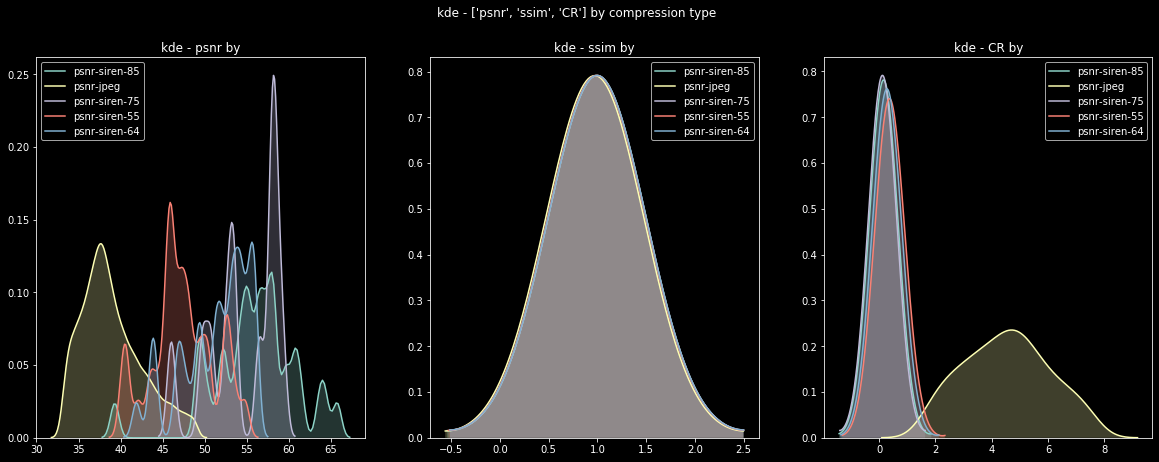

In [46]:
# sns.kdeplot(merged_df['psnr'], shade=True, bw=.5, color="olive")
# sns.kdeplot(merged_df[merged_df['compression'] == 'jpeg']['psnr'], shade=True, bw=.5, label = 'psnr-jpeg')# color="r")
# sns.kdeplot(merged_df[merged_df['compression'] == 'siren-85']['psnr'], shade=True, bw=.5, label = 'psnr-siren-85') #color="b")
target_features = 'psnr,ssim,CR'.split(",")
fig, axes = plt.subplots(1, len(target_features), figsize = (20, 7))
for pos, target_feature in enumerate(target_features):
    for c in set(merged_df['compression'].values):
        sns.kdeplot(merged_df[merged_df['compression'] == f'{c}'][f'{target_feature}'], shade=True, bw=.5, label = f'psnr-{c}', ax = axes[pos])
        pass
    axes[pos].set_title(f'kde - {target_feature} by')
    pass
fig.suptitle(f'kde - {target_features} by compression type')
plt.show()

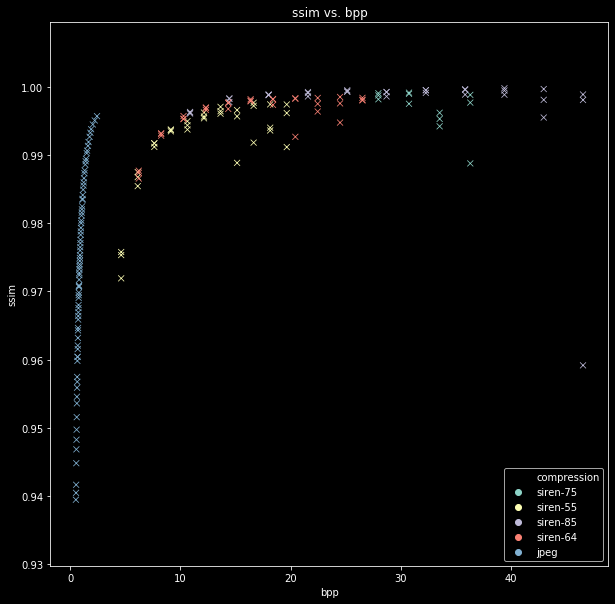

In [29]:
x = 'bpp'
x_vars = "bpp,file_size_bits".split(",")
y_vars = "psnr,ssim,CR".split(",")[0:1]
y = "ssim"
hue = "compression"

fig, ax = plt.subplots(1, len(y_vars[0:1]), figsize = (10, 10))
# fig.suptitle(f"{x} vs. others")

chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, ax=ax, hue='compression', marker='x')
ax.set_title(f'{y} vs. {x}')
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

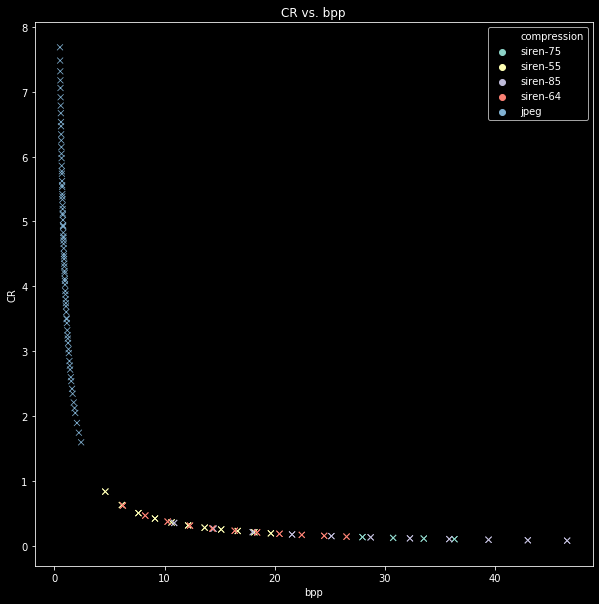

In [30]:
x = 'bpp'
x_vars = "bpp,file_size_bits".split(",")
y_vars = "psnr,ssim,CR".split(",")[0:1]
y = "CR"
hue = "compression"

fig, ax = plt.subplots(1, len(y_vars[0:1]), figsize = (10, 10))
# fig.suptitle(f"{x} vs. others")

sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, ax=ax, hue='compression', marker='x')
ax.set_title(f'{y} vs. {x}')
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

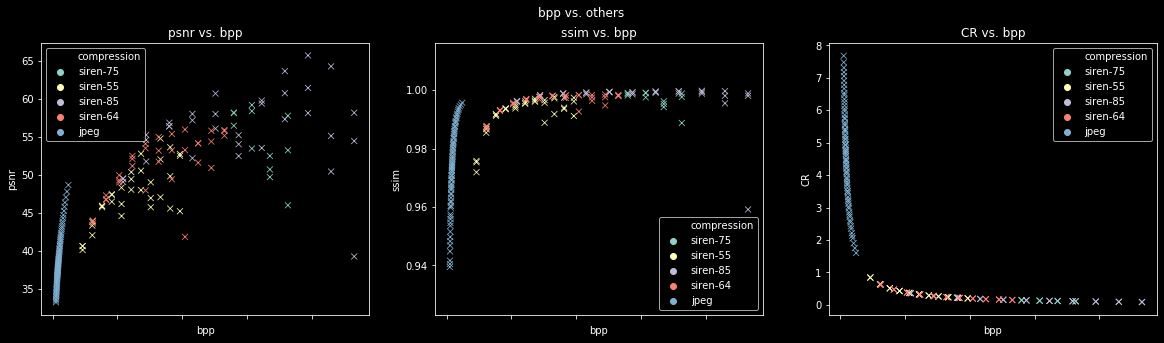

In [31]:
x = 'bpp'
x_vars = "bpp,file_size_bits".split(",")
y_vars = "psnr,ssim,CR".split(",")
hue = "compression"

fig, axes = plt.subplots(1, len(y_vars), figsize = (20, 5))
fig.suptitle(f"{x} vs. others")

for ax, y in zip(axes, y_vars):
    chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, ax=ax, hue='compression', marker='x')
    ax.set_title(f'{y} vs. {x}')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    pass
plt.show()

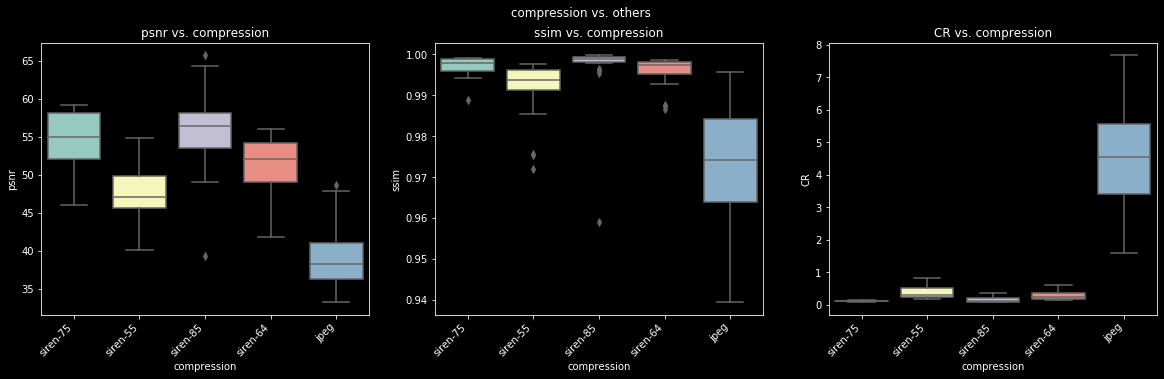

In [32]:
x = 'compression'

fig, axes = plt.subplots(1, len(y_vars), figsize = (20, 5))
fig.suptitle(f"{x} vs. others")

for ax, y in zip(axes, y_vars):
    chart = sns.boxplot(x=f"{x}", y=f"{y}", data=merged_df, ax=ax)
    ax.set_title(f'{y} vs. {x}')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    pass
plt.show()

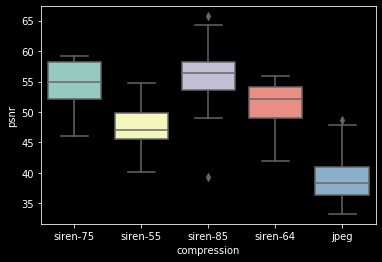

In [33]:
x_vars = "bpp,file_size_bits".split(",")
y_vars = "psnr,ssim,CR".split(",")
hue = "compression"

sns.boxplot(x="compression", y="psnr", data=merged_df)

plt.show()

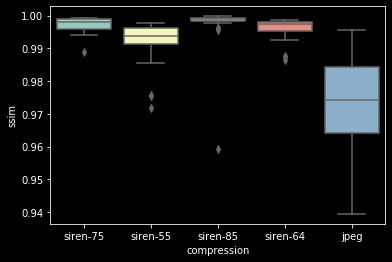

In [34]:
x_vars = "bpp,file_size_bits".split(",")
y_vars = "psnr,ssim,CR".split(",")
hue = "compression"

sns.boxplot(x="compression", y="ssim", data=merged_df)

plt.show()

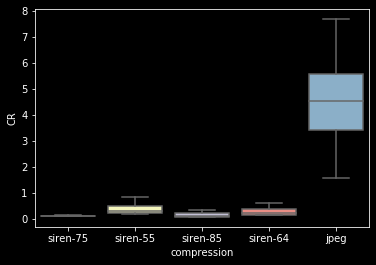

In [35]:
x_vars = "bpp,file_size_bits".split(",")
y_vars = "psnr,ssim,CR".split(",")
hue = "compression"

sns.boxplot(x="compression", y="CR", data=merged_df)

plt.show()

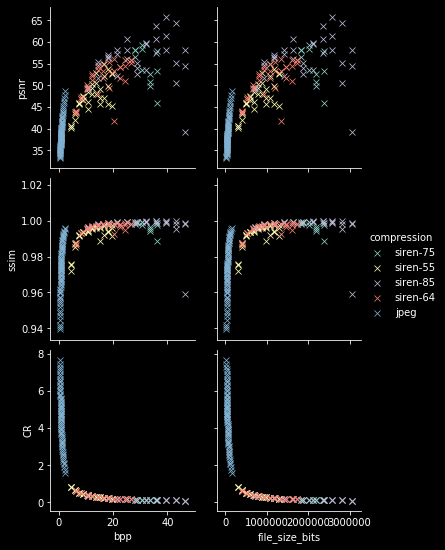

In [36]:
x_vars = "bpp,file_size_bits".split(",")
y_vars = "psnr,ssim,CR".split(",")
hue = "compression"

g = sns.PairGrid(merged_df, x_vars=x_vars, y_vars=y_vars, hue=hue)
g.map(sns.scatterplot, marker='x')
g.add_legend()

# g.savefig("compare_compressions_metrices.png")

plt.show()

In [37]:
x = 'file_size_bits'
x_vars = "bpp,file_size_bits".split(",")
y_vars = "psnr,ssim,CR".split(",")
hue = "compression"

fig.suptitle(f"{x} vs. others")

for ax, y in zip(axes, y_vars):
    chart = sns.scatterplot(x=f"{x}", y=f"{y}", data=merged_df, ax=ax, hue='compression')
    ax.set_title(f'{y} vs. {x}')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    pass
plt.show()

In [38]:
markers =  (["x"] * (len(set(merged_df["compression"].values)) - 1)) + ["o"]

In [39]:
?sns.lmplot

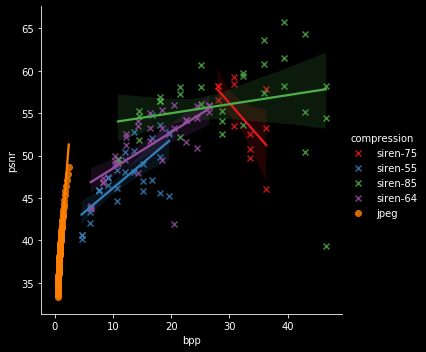

In [40]:
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="bpp", y="psnr", hue="compression",
    height=5,
    order=1,
    palette="Set1", markers=markers
).fig.subplots_adjust(wspace=.02)

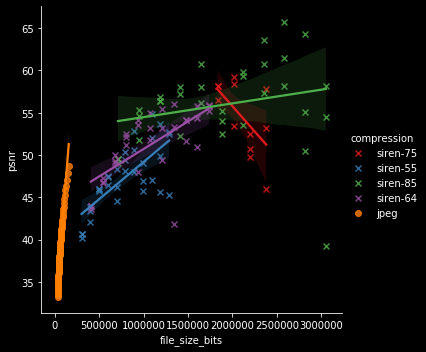

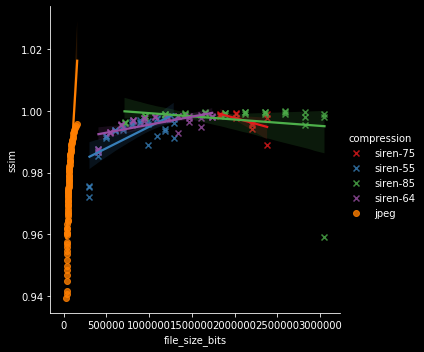

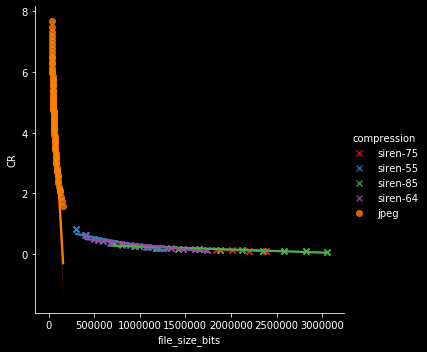

In [41]:
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="file_size_bits", y="psnr", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="file_size_bits", y="ssim", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)
plt.show()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="file_size_bits", y="CR", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)
plt.show()

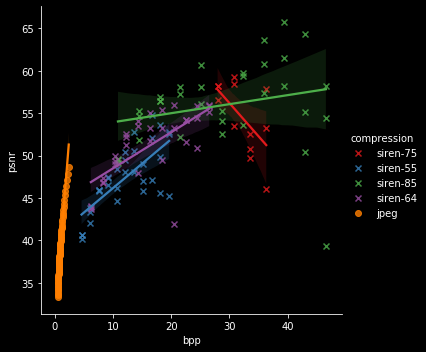

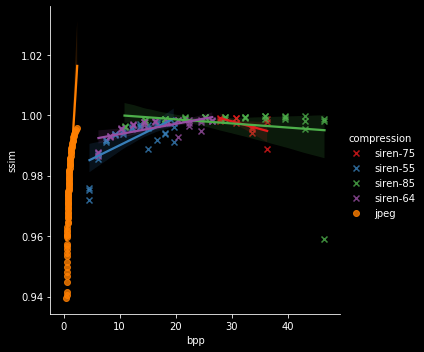

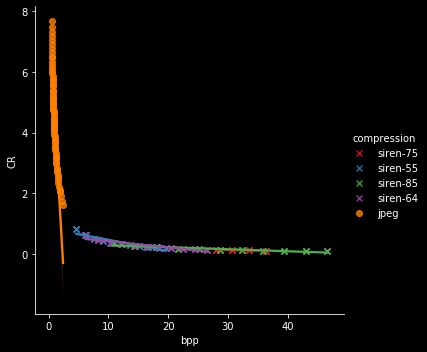

In [42]:
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="bpp", y="psnr", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="bpp", y="ssim", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)
plt.show()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=merged_df,
    x="bpp", y="CR", hue="compression",
    height=5,
    palette="Set1", markers=markers).fig.subplots_adjust(wspace=.02)
plt.show()

### References:
---
#### Standard Libs:
  - [Lib/statistics.py](https://docs.python.org/3/library/statistics.html)
---
#### Seaborn:
  - [seaborn.jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=reg)
---
#### Drawing from data:
  - [drawingfromdata](https://www.drawingfromdata.com/)
  - [HOW TO ROTATE AXIS LABELS IN SEABORN AND MATPLOTLIB](https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib)